---


## PR451 Testing

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas     as pd
import mplfinance as mpf
#import datetime   as datetime
#import numpy      as np
#import matplotlib.dates as mdates
#import matplotlib.pyplot as plt

            Open  Close  High  Low      Date.1  Volume
Date                                                  
2019-09-01    29     20    29   20  2019-09-01   10787
2019-09-02    29     31    33   23  2019-09-02   17215
2019-09-03    29     20    29   20  2019-09-03   16697


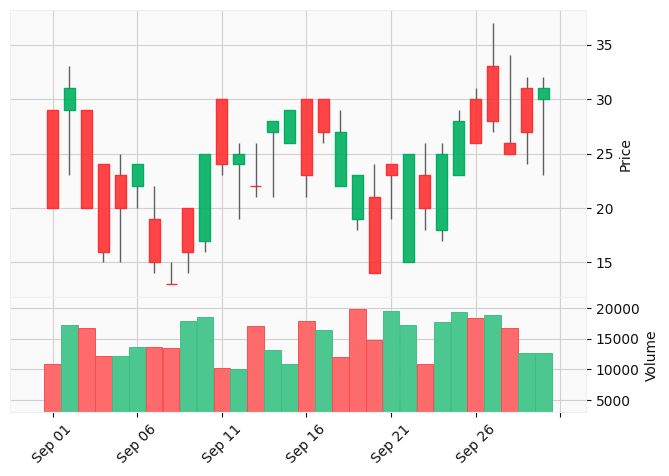

In [3]:
# %load pr451_test.py
import pandas as pd
import mplfinance as mpf
import ast 

df = pd.read_csv('pr451data.csv',index_col=0,parse_dates=True)

df = df.iloc[0:30]
print(df.head(3))


custom_colors = []
for i in range(len(df)):
    if i % 3 == 0:
        custom_colors.append(mpf.make_marketcolors(up='#29c9ff', down='#f3b5ff', edge='#29c9ff',
                                                   wick='#29c9ff', ohlc='#32a852', volume='#a89132'))
    elif i%5 == 0:
        custom_colors.append("#000000")
    else:
        custom_colors.append(None)

#STYLE = 'binance'
STYLE = 'yahoo'

#mpf.plot(df, type='candle',style=STYLE,volume=True,block=False,figscale=3.0,savefig='pr451t2no.jpg')
mpf.plot(df, type='candle',style=STYLE,volume=True,block=False)

##mpf.plot(df, type='candle',style=STYLE,volume=True,block=False,marketcolor_overrides=custom_colors)

##mpf.plot(df, type='candle',style=STYLE,volume=True,block=False,marketcolor_overrides=custom_colors,mco_faceonly=True)

#nans = [float('nan')]*len(df.columns)
#for row in [8,9,10,11]:
#    df.loc[df.index[row]] = nans
#mpf.plot(df, type='candle',style=STYLE,volume=True,block=False,figscale=1.5)
#mpf.plot(df, type='candle',style=STYLE,override_marketcolors=custom_colors,volume=True,figscale=3.0,savefig='pr451t2ye.jpg')
#mpf.plot(df, type='candle',style=STYLE,override_marketcolors=custom_colors,volume=True,figscale=1.5)


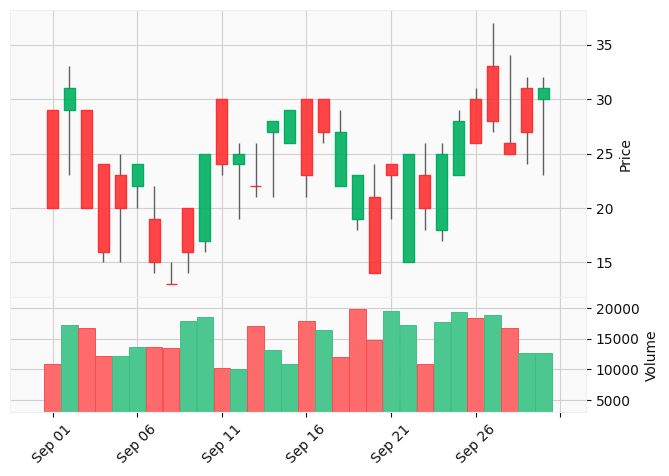

In [4]:
fig, axlist = mpf.plot(df, type='candle',style=STYLE,volume=True,returnfig=True)

In [5]:
axlist[0].get_xticklabels(which='both')
axlist[0].get_xticks()
len(df)

[]

array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.])

30

In [6]:
axlist[2].get_xticklabels()

[Text(-5.0, 0, ''),
 Text(0.0, 0, 'Sep 01'),
 Text(5.0, 0, 'Sep 06'),
 Text(10.0, 0, 'Sep 11'),
 Text(15.0, 0, 'Sep 16'),
 Text(20.0, 0, 'Sep 21'),
 Text(25.0, 0, 'Sep 26'),
 Text(30.0, 0, ''),
 Text(35.0, 0, '')]

In [7]:
newxticks = []
newlabels = []
format = '%Y-%b-%d'
format = '%b-%d'
for xt in axlist[0].get_xticks():
    p = int(xt)
    if p >= 0 and p < len(df):
        ts = df.index[p]
        newxticks.append(p)
        newlabels.append(ts.strftime(format))
newxticks.append(len(df)-1)
newlabels.append(df.index[len(df)-1].strftime(format))
print(newxticks)
print(newlabels)

[0, 5, 10, 15, 20, 25, 29]
['Sep-01', 'Sep-06', 'Sep-11', 'Sep-16', 'Sep-21', 'Sep-26', 'Sep-30']


In [8]:
axlist[0].set_xticks(newxticks)
axlist[0].set_xticklabels(newlabels)

[]

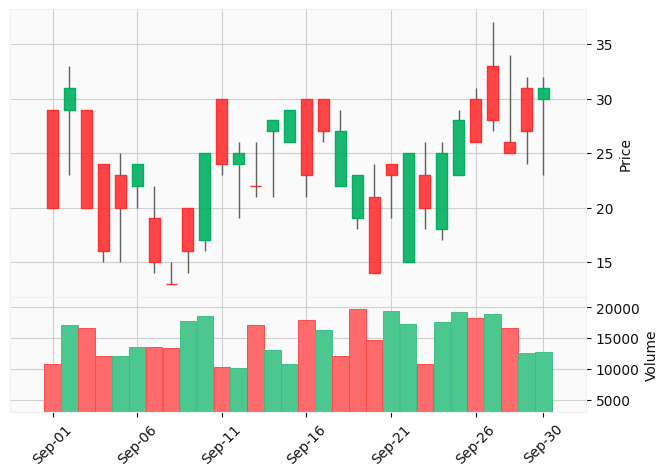

In [9]:
fig